In [3]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt

#Pre Exercise
This exercise is optional. You only have to hand in 10 exercises. If you hand in this one you may skip one of the earlier one.

In the google doc sheet we have 41 restaurant and 44 people. There are about 1000 rating in total. We want to do collaborative filtering with 7 hidden features.

https://docs.google.com/spreadsheets/d/143AcuFLKRLkz7yoKiEas0rABfuKPYCSlVKY1DUbFiBo/edit#gid=0

1) What is the size of matrix F (*foodplace*)?

In [2]:
|
V Restaurent[        ]
        ->feature
(41,7)

SyntaxError: invalid syntax (<ipython-input-2-de591cb85bf6>, line 1)

2) What is the size of matrix P?

|
V people[        ]
        ->feature
(44,7)

3) What should be the dimension of the Guess G? Write a numpy statement to calculate the Guess$G$ from $F$ and $P$.

In [ ]:
Guess
G(people, restaurant)
 = P•F.T
=[  f1p1   f2p1     ]
    f1p2   f2p2
    f1p3   f3p3
    f1p4



This code will help you do pre exercise. Try print names, restaurants, has_rating, rating to see what they are. rating and has_rating matrix use the convention that row=People, column=restaurant.

#ALL you need to do
let's say you given rating
- random P,F
- do it many times:
    - G
    - HGR
    - dp = HGR•F
    - df = HGR.T•P
    - P = P-eta x dP
    - F = F-eta x dF

name ['Piti', 'Meena', 'Pitoon', 'Sohum', 'Sam', 'Keng', 'O', 'Yok', 'Kitty', 'Time', 'Robroo', 'Peem', 'Chanon', 'Ohm', 'Sun', 'Tii', 'Tow', 'John', 'Mint', 'Opal', 'Kelly', 'Jay', 'Sharik', 'Ou', 'PJ', 'Punawit', 'Martin', 'Ploy', 'Majeed', 'Bossy', 'Sea', 'Pan', 'Ice', 'Karn', 'May', 'Rin', 'Peter', 'Ham', 'Benz', 'Billy', 'Kanat', 'Sam', 'Boss', 'Best']
restaurants ['Mai-tok-mai-tak', 'Puttharaksa', 'Big Mamma', 'Seefah', 'Music Square', 'Mamma Mia', 'Srijan', 'Steak House', 'Anya', 'Chicky Chic', 'Loong Nuad', 'Nong Na', 'Shabu Nangnai', 'Buri-yummy', 'Gin-na', 'Fong-nom', 'Fresh box', 'Buta grill', 'Lodiham', 'Kao-pun', 'Sutharos', 'Hua-seng-hong', 'Jok at 3 AM', 'RIT', 'Hong nung len', 'slum bar', 'Ban-nam', 'Mango Bar', 'Sri suwan', 'Herb Garden', 'Best Bar', 'Princess Cafe', 'Hachi Ban', 'Vietnam Hut', 'Chi-see', 'J-Class', 'Bon chon', 'Sunrise Taco', 'Beach Bar', 'Brew & Bev', 'Bake & Bite']
has_rating [[ 0.  1.  0. ...,  0.  0.  0.]
 [ 0.  0.  1. ...,  0.  0.  0.]
 [ 1.  1. 

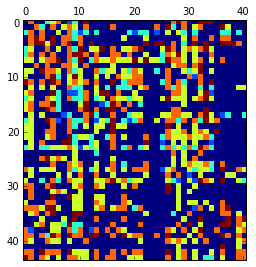

In [5]:
import StringIO
import csv
with open('Restaurant Rating - Sheet1.csv') as f:
    s = StringIO.StringIO(f.read()) 
    reader = csv.reader(s, delimiter=',')
    raw = [row for row in reader]

def get_names(raw):
    return raw[2][2:]

def get_restaurant(raw):
    restaurants = []
    for i in range(3, len(raw)):
        restaurants.append(raw[i][1])
    return restaurants

def get_rating(raw):
    
    names = get_names(raw)
    restaurants = get_restaurant(raw)
    #print restaurants
    name_offset = 2
    rests_offset = 3
    
    n_names = len(names)
    n_rests = len(restaurants)

    has_rating = np.zeros((n_names, n_rests))
    rating = np.zeros((n_names, n_rests))
    
    for ir in range(n_rests):
        this_row = raw[rests_offset + ir]
        #print ir, n_rests, len(raw), this_row[1]
        #print this_row
        for ip in range(n_names):
            #print ip, name_offset, len(this_row)
            this_cell =  this_row[name_offset + ip]
            hr = this_cell.isdigit()
            has_rating[ip, ir] = 1 if hr else 0
            if hr:
                rating[ip, ir] = int(this_cell)
    return names, restaurants, has_rating, rating

names, restaurants, has_rating, rating = get_rating(raw)
print "name", names
print "restaurants", restaurants
print "has_rating", has_rating
print "rating", rating

plt.matshow(rating, vmin=0, vmax=5)

4) What is the dimension of rating matrix? AFTER you figure out, check it with rating.shape.

In [ ]:
should be like (44,41)

In [ ]:
print rating.shape[0], rating.shape[1]

5) What is the dimension of has_rating matrix? AFTER you figure out, check it with rating.shape.

In [ ]:
#44, 41
print has_rating.shape[0], has_rating.shape[1]

6) Suppose you have a guess matrix G. How do you calculate HGR matrix? Write a numpy code for that

In [ ]:
HGR = np.multiply(H, np.subtract(G,R))

7)The update rule for $P$ is


$P = P - \eta\; dp$

Write down the formula for dp. Then, write a numpy code to calculate dp.

In [ ]:
new_P = np.subtract(P, 2*eta*np.dot(HGR, F))

8)The update rule for $F$ is

$F = F - \eta\; df$

Write down the formula for df. Then, write a numpy code to calculate df.

In [ ]:
new_P = np.subtract(F, 2*eta*np.dot(HGR.T, P))

9) Write the numpy code to calculate the cost. (you may find np.sum useful)

In [ ]:
np.sum(np.sum(np.multiply(H, np.subtract(G,R)**2), axis = 0), axis = 0)

#Exercise
You have given CSV file for all the rating. Now your job is to figure out what is the next restaurant you should go next using collaborative filtering with gradient descent.

The idea is to keep update matrix F and P with the update rule we find above many many times.

Debugging this is quite a pain. One way to do it is to monitor the value of the costfunction making sure it is going in the right direction.

If you are doing it right this should not be more than 50 lines.

In [ ]:
print rating.shape

print 41*44

GSHAPE (44, 41)


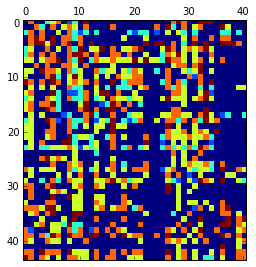

In [6]:
# names, restaurants, has_rating, rating
from scipy.optimize import minimize

P = np.random.rand(44,7)
F = np.random.rand(41,7)
G = np.dot(P,F.T)

def cost(G):
    G = G.reshape(44,41)
    return np.sum(np.sum(np.multiply(has_rating, np.subtract(G,rating)**2), axis = 0), axis = 0)

print "GSHAPE",G.shape
ret = minimize(cost, x0 = G).x
ret = ret.reshape(44,41)

plt.matshow(ret*has_rating, vmin=0, vmax=5)


In [7]:
for i in range(0,5):
    new_P = P-2*0.05*np.dot(np.multiply(has_rating, np.subtract(ret,rating))**2, F)

    new_F = F-2*0.05*np.dot((np.multiply(has_rating, np.subtract(ret,rating))**2).T, P)

    new_G = np.dot(new_P,new_F.T)
    ret = minimize(cost, x0 = new_G).x
    ret = ret.reshape(44,41)
    F=new_F
    P=new_P
    print ret
# plt.matshow(rating, vmin=0,vmax=5)
# plt.figure()
# plt.matshow(ret, vmin=0, vmax=5)

[[ 1.82008313  4.00000013  1.11547811 ...,  1.62982155  0.85856508
   1.57048842]
 [ 1.72036509  1.65937298  4.00000012 ...,  2.43581416  1.38028708
   2.16065087]
 [ 2.00000003  4.00000014  0.99737411 ...,  1.4609233   2.00000006
   1.23165579]
 ..., 
 [ 1.70229303  1.5373074   0.6733097  ...,  1.50396072  3.00000012
   1.15864977]
 [ 4.00000006  4.00000009  1.86413839 ...,  2.79709511  4.00000013
   4.00000007]
 [ 5.00000014  4.00000012  1.13874082 ...,  1.92430497  4.00000015
   4.00000011]]
[[ 1.82008313  4.00000034  1.11547811 ...,  1.62982155  0.85856508
   1.57048842]
 [ 1.72036509  1.65937298  4.00000029 ...,  2.43581416  1.38028708
   2.16065087]
 [ 2.00000009  4.00000033  0.99737411 ...,  1.4609233   2.00000017
   1.23165579]
 ..., 
 [ 1.70229303  1.5373074   0.6733097  ...,  1.50396072  3.00000029
   1.15864977]
 [ 4.00000015  4.00000022  1.86413839 ...,  2.79709511  4.00000031
   4.0000002 ]
 [ 5.00000033  4.00000028  1.13874082 ...,  1.92430497  4.00000036
   4.00000029]]


In [8]:
HTML(maketable(rating, has_rating, ret, restaurants, names))

NameError: name 'HTML' is not defined

In [ ]:
plt.matshow(rating, vmin=0, vmax=5)
plt.figure()
plt.matshow(ret, vmin=0, vmax=5)


#Debugging Tip
To compare your guess rating(G*has_rating) and the actual rating graphically use

plt.matshow(rating, vmin=0, vmax=5)

 if they look almost the same then your algorithm is doing the right thing 

In [ ]:
#  plt.matshow(rating, vmin=0, vmax=5)
#  plt.figure()
# plt.matshow(G*has_rating, vmin=0, vmax=5)

#Once you have F and P and guess matrix.
I wrote this so that visualizing your result is easier.

In [ ]:
from IPython.display import HTML

class TableCell:
    
    def __init__(self, text, tc=None, color=None):
        self.text = text
        self.tc = tc
        self.color = color
    
    def to_html(self):
        return '<td>%s</td>'%self.text
    
def maketable(rating, has_rating, guess, restaurants, names):
    n_rests = len(restaurants)
    n_names = len(names)
    tab = np.empty((n_rests+1, n_names+1),dtype='object')
    #print tab.shape

    for irest in range(n_rests):
        tab[irest+1,0] = restaurants[irest]

    for iname in range(n_names):
        tab[0,iname+1] = names[iname]

    for irest in range(n_rests):
        for iname in range(n_names):
            if not has_rating[iname, irest]:
                tab[irest+1, iname+1] = TableCell('<span style="color:red">%3.2f</span>'%(guess[iname, irest]))
            else:
                tab[irest+1, iname+1] = TableCell('<span style="color:blue">%3.2f</span><span style="color:red">(%3.2f)</span>'%(rating[iname, irest], guess[iname, irest]))
    #now convert tab array to nice html table
    nrow, ncol = tab.shape
    t = []
    t.append('<table>')
    for irow in range(nrow):
        t.append('<tr>')
        for icol in range(ncol):
            cell = tab[irow,icol]
            if cell is not None:
                if isinstance(cell,TableCell):
                    t.append(tab[irow, icol].to_html())
                else:
                    t.append('<td>')
                    t.append(tab[irow, icol])
                    t.append('</td>')
            else:
                t.append('<td></td>')
        t.append('</tr>')  
    t.append('</table>')
    return '\n'.join(t)

In [ ]:
# call it like this

HTML(maketable(rating, has_rating, G, restaurants, names))